# Some code for various necessary plots

In [5]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm import tqdm
import visualisation as vis
from delta_hes_model import *

plt.rcParams['text.usetex'] = True

## Parameters

In [6]:
#set the lattice of the cells 
P = 20
Q = 1

lattice = get_lattice(P, Q)

# # set initial parameters of the reactions 
gamma_h = 0.03
gamma_d = 0.03
gamma_m = 0.03
p_h = 100
p_d = 100
T_h = 20
T_coupling = 0
w_h = 1
w_coupling = 0.01
l = 5
n = 3

params = get_params(gamma_h, gamma_d, gamma_m, p_h, p_d, T_h, T_coupling, w_h, w_coupling, l, n, lattice, grad_hes = True, grad_coup = False, grad_hes_strength = 0.2, grad_coup_strength = 0)
print(params)

namespace(gamma_h=0.03, gamma_d=0.03, gamma_m=0.03, p_h=100, p_d=100, T_h=array([20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8, 22. ,
       22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8]), T_coupling=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]), w_h=1, w_coupling=0.01, l=5, n=3, grad_hes=True, grad_coup=False, grad_hes_strength=0.2, grad_coup_strength=0)


## Gradient plot

Text(0, 0.5, 'Time delay (mins)')

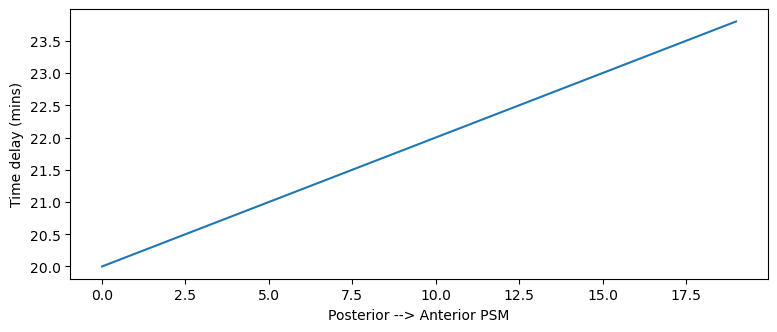

In [4]:
plt.figure(figsize=(9,3.5))
plt.plot(params.T_h)
plt.xlabel('Posterior --> Anterior PSM')
plt.ylabel('Time delay (mins)')

## Nullclines for Hes oscillations

m_h_plot [ 0.          0.50505051  1.01010101  1.51515152  2.02020202  2.52525253
  3.03030303  3.53535354  4.04040404  4.54545455  5.05050505  5.55555556
  6.06060606  6.56565657  7.07070707  7.57575758  8.08080808  8.58585859
  9.09090909  9.5959596  10.1010101  10.60606061 11.11111111 11.61616162
 12.12121212 12.62626263 13.13131313 13.63636364 14.14141414 14.64646465
 15.15151515 15.65656566 16.16161616 16.66666667 17.17171717 17.67676768
 18.18181818 18.68686869 19.19191919 19.6969697  20.2020202  20.70707071
 21.21212121 21.71717172 22.22222222 22.72727273 23.23232323 23.73737374
 24.24242424 24.74747475 25.25252525 25.75757576 26.26262626 26.76767677
 27.27272727 27.77777778 28.28282828 28.78787879 29.29292929 29.7979798
 30.3030303  30.80808081 31.31313131 31.81818182 32.32323232 32.82828283
 33.33333333 33.83838384 34.34343434 34.84848485 35.35353535 35.85858586
 36.36363636 36.86868687 37.37373737 37.87878788 38.38383838 38.88888889
 39.39393939 39.8989899  40.4040404  40.909

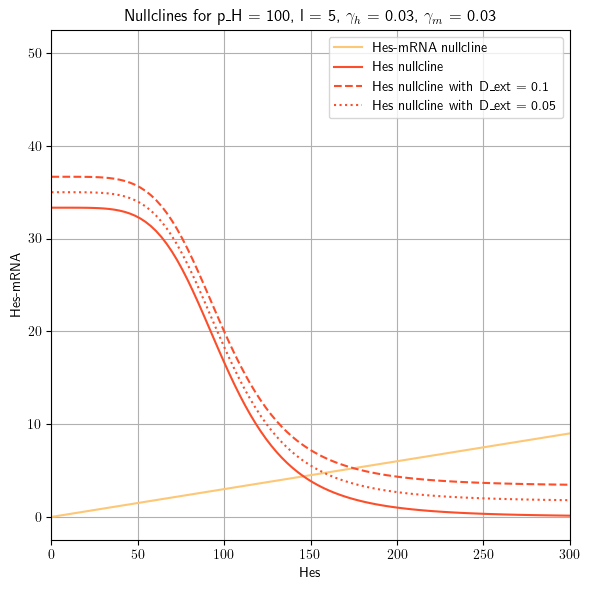

In [8]:
def nullclines_Hes(m_h, h, p_h, l, gamma_h, gamma_m):
    """Calculate the nullclines for Hes."""
    # Hes protein nullcline
    h_null = gamma_h**(-1)*m_h
    
    # Hes mRNA nullcline
    m_h_null = gamma_m**(-1) * p_h**l / (p_h**l + h**l)

    return h_null, m_h_null

def nullclines_Hes_deltabath(m_h, h, D_ext, p_h, l, gamma_h, gamma_m):
    """Calculate the nullclines for Hes."""
    # Hes protein nullcline
    h_null = gamma_h**(-1)*m_h
    
    # Hes mRNA nullcline
    m_h_null = gamma_m**(-1) * p_h**l / (p_h**l + h**l) + gamma_m**(-1)*D_ext

    return h_null, m_h_null

p_h = 100
l = 5
gamma_h = 0.03
gamma_m = 0.03

D_ext_1 = 0.1 # external delta concentration
D_ext_2 = 0.05

m_h_plot = np.linspace(0, 50, 100)*1
print('m_h_plot', m_h_plot)
h_plot = np.linspace(0, 300, 100)*1
print('h_plot', h_plot)

# Calculate nullclines
h_null_plot, m_h_null_plot = nullclines_Hes(m_h_plot, h_plot, p_h, l, gamma_h, gamma_m)

h_null_ext_1, m_h_null_ext_1 = nullclines_Hes_deltabath(m_h_plot, h_plot, D_ext_1, p_h, l, gamma_h, gamma_m)
h_null_ext_2, m_h_null_ext_2 = nullclines_Hes_deltabath(m_h_plot, h_plot, D_ext_2, p_h, l, gamma_h, gamma_m)
# m_h_null_ext_2, h_null_ext_2 = nullclines_Hes_deltabath(m_h_plot, h_plot, D_ext_2, p_h, l, gamma_h, gamma_m)

hescolor1 = '#fdc776'  # light
hescolor2 = '#fc4e2a'  # dark

plt.figure(figsize=(6, 6)) 
plt.plot(h_null_plot, m_h_plot,  label='Hes-mRNA nullcline', color = hescolor1)
plt.plot(h_plot, m_h_null_plot,  label='Hes nullcline', color = hescolor2)
# plt.plot(m_h_plot, h_null_ext_1, label='Hes-mRNA nullcline with D_ext = ' + str(D_ext_1), color = hescolor1, linestyle='--')
plt.plot(h_plot, m_h_null_ext_1, label='Hes nullcline with D_ext = ' + str(D_ext_1), color = hescolor2, linestyle='--')
# plt.plot(m_h_plot, h_null_ext_2, label='Hes-mRNA nullcline with D_ext = ' + str(D_ext_2), color = hescolor1, linestyle=':')
plt.plot(h_plot, m_h_null_ext_2, label='Hes nullcline with D_ext = ' + str(D_ext_2), color = hescolor2, linestyle=':')

plt.xlabel('Hes')
plt.ylabel('Hes-mRNA')
plt.title('Nullclines for p_H = ' + str(p_h) + ', l = ' + str(l) + ', $\gamma_h$ = ' + str(gamma_h) + ', $\gamma_m$ = ' + str(gamma_m))
plt.xlim(0, 300)
plt.grid()
plt.legend()
plt.tight_layout()

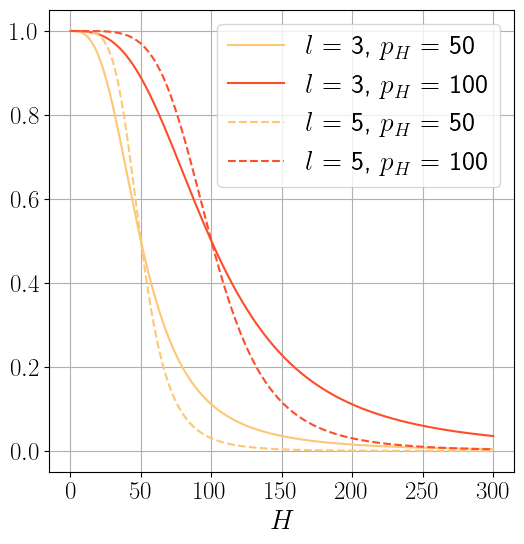

In [13]:
hes = np.linspace(0,300,300)

plt.figure(figsize=(6, 6))
plt.plot(hes, hill_function_negative(hes, 3, 50), label = r'$l$ = 3, $p_H$ = 50', color = hescolor1)
plt.plot(hes, hill_function_negative(hes, 3, 100), label = r'$l$ = 3, $p_H$ = 100', color = hescolor2)
plt.plot(hes, hill_function_negative(hes, 5, 50), label = r'$l$ = 5, $p_H$ = 50', color = hescolor1, linestyle='--')
plt.plot(hes, hill_function_negative(hes, 5, 100), label = r'$l$ = 5, $p_H$ = 100', color = hescolor2, linestyle='--')
plt.xlabel('$H$', fontsize = 20)
plt.grid()
plt.legend(fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.savefig('theory-hill-funcs.png', dpi=600)